In [ ]:
#importing and exporting Data
# From Bitcoin App
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500, 6), 0)

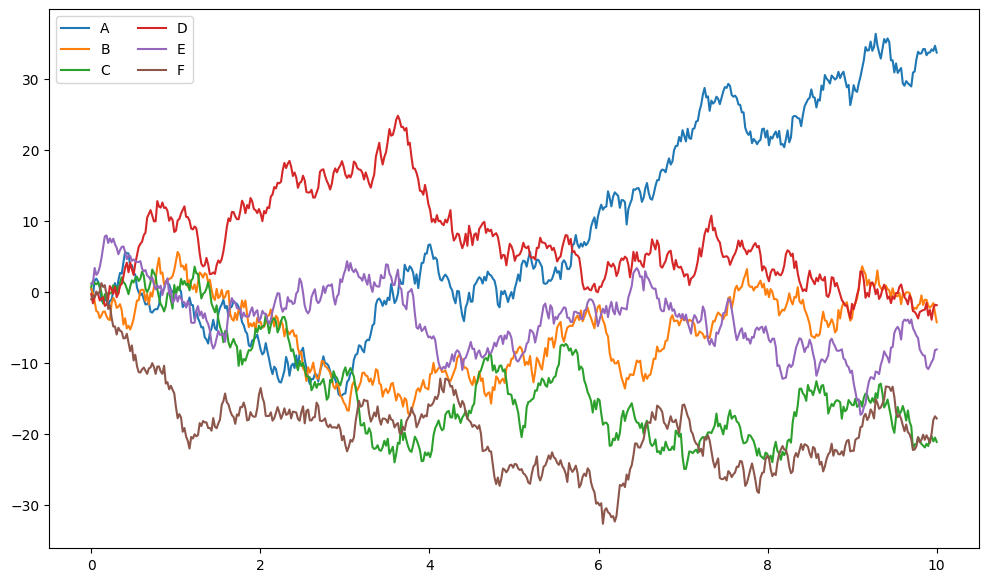

In [ ]:
plt.figure(figsize=(12, 7))
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc = 'upper left')

In [ ]:
import requests
import pandas as pd

In [ ]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [ ]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2023-06-28 19:47:56.542513')

In [ ]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [ ]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)

In [ ]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2023-06-28 20:00:00,30184,30245,29868,30095,213.112143,6.398816e+06
2023-06-28 21:00:00,30094,30140,29954,30109,127.293733,3.823472e+06
2023-06-28 22:00:00,30109,30201,30030,30140,45.512457,1.370817e+06
2023-06-28 23:00:00,30140,30184,30088,30105,13.357795,4.025855e+05
2023-06-29 00:00:00,30104,30177,30061,30079,15.522392,4.675397e+05


<Axes: xlabel='CloseTime'>

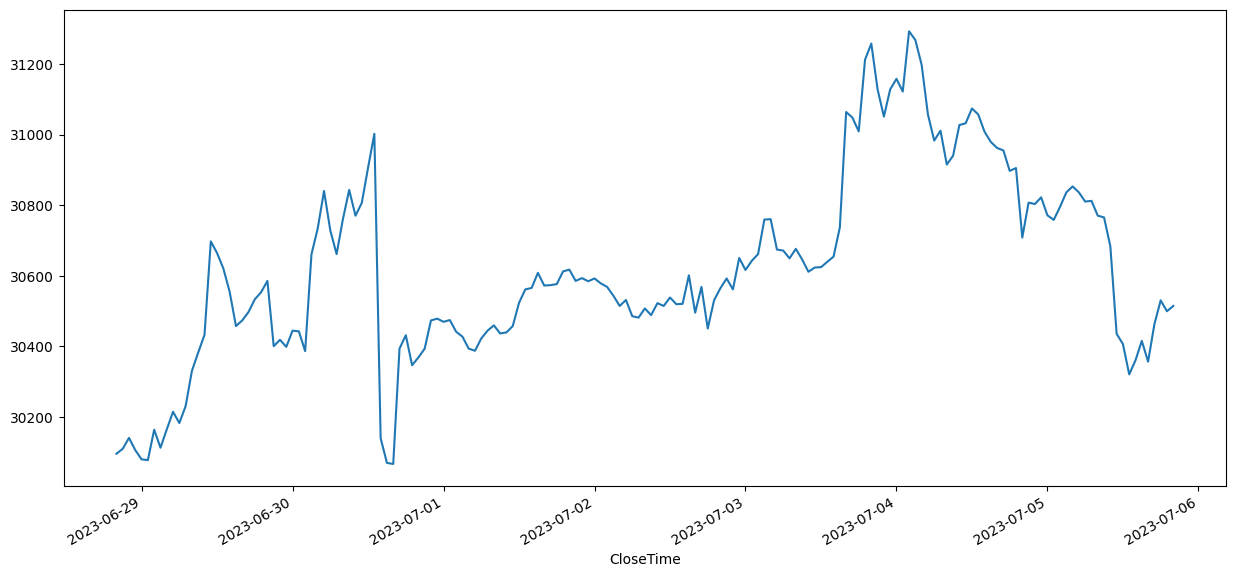

In [ ]:
btc['ClosePrice'].plot(figsize=(15, 7))

In [ ]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2023-06-28 20:00:00,1847.1,1850.1,1816.5,1832.6,375.161971,687089.575743
2023-06-28 21:00:00,1832.1,1834.5,1825.2,1831.2,137.363098,251218.440618
2023-06-28 22:00:00,1831.4,1833.8,1825.9,1829.6,46.489680,85056.501272
2023-06-28 23:00:00,1829.9,1833.6,1826.2,1827.8,104.584888,191495.176431
2023-06-29 00:00:00,1827.8,1835.7,1826.8,1827.8,31.711353,58056.417229


<Axes: xlabel='CloseTime'>

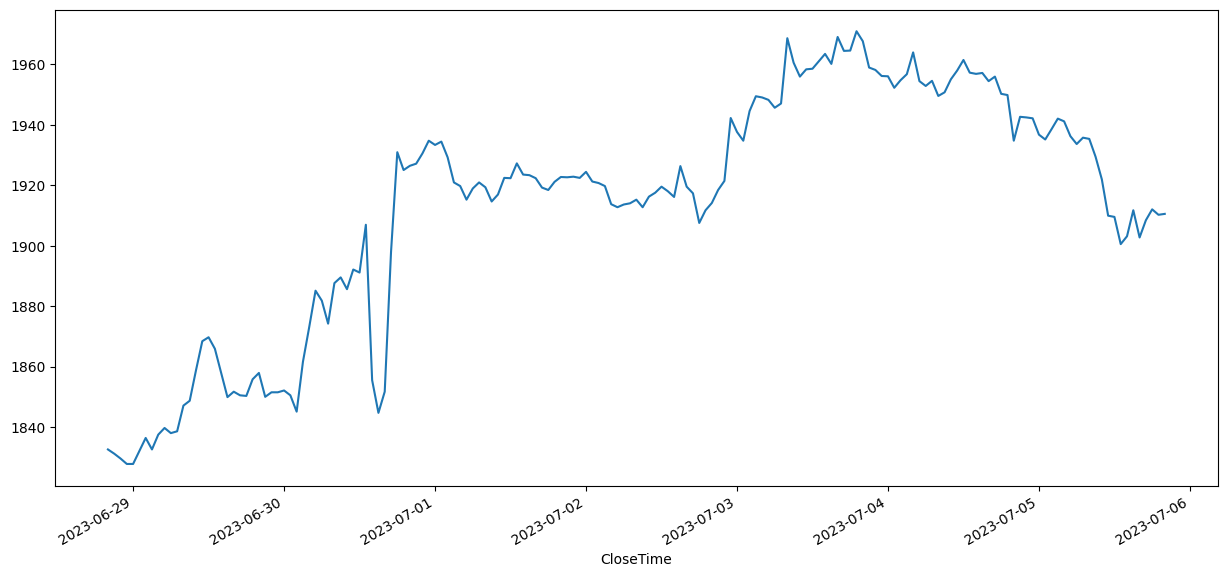

In [ ]:
eth['ClosePrice'].plot(figsize=(15, 7))

In [ ]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2023-06-28 20:00:00,1847.1,1850.1,1816.5,1832.6,375.161971,687089.575743
2023-06-28 21:00:00,1832.1,1834.5,1825.2,1831.2,137.363098,251218.440618
2023-06-28 22:00:00,1831.4,1833.8,1825.9,1829.6,46.489680,85056.501272
2023-06-28 23:00:00,1829.9,1833.6,1826.2,1827.8,104.584888,191495.176431
2023-06-29 00:00:00,1827.8,1835.7,1826.8,1827.8,31.711353,58056.417229


In [ ]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [ ]:
output_notebook()

In [ ]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

#p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend_field='Bitcoin')
p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend_label='Bitcoin')



p1.legend.location = "top_left"

show(p1)

In [ ]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend_label='Ether')
#p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend_field='Ether')

p1.legend.location = "top_left"

show(p1)

In [ ]:
writer = pd.ExcelWriter('cryptos.xlsx')

In [ ]:
btc.to_excel(writer, sheet_name='Bitcoin')

In [ ]:
eth.to_excel(writer, sheet_name='Ether')

In [ ]:
writer.save()

<ipython-input-42-16d93d5523a4>:1: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()
